<div id="instructions" style="border-radius: 5px; background-color:#f5f5f5;" >
<h1>Instructions</h1>
<p>Look for the <b>3 Your Turn</b> sections to complete the code and/or answer questions.<p>
</div>

# Lesson 6 - Introduction to Regression

## Introduction

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the ‘best fit’ to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). “Best fit” means that there is an optimal set of parameters according to an evaluation criteria we choose.

A regression model attempts to predict the value of one variable, known as the **dependent variable**, **response variable** or **label**, using the values of other variables, known as **independent variables**, **explanatory variables** or **features**. Single regression has one label used to predict one feature. Multiple regression uses two of more feature variables. 

Virtually all machine learning models, including some of the latest deep learning methods, are a form of regression. These methods often suffer from the same problems, including overfitting and mathematically unstable fitting methods. 

Linear regression is the foundational form of regression. To solve linear regression, normally the **method of least squares** is used.  Here, we are looking to find parameters of the function that minimizes the square of the error between the predictions, which are the function output, and the observed target values.

## History

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/Tobias_Mayer.jpg" title="Tobias Mayer" style="float:left; margin-right: 7px; height: 150px;"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e3/Pierre-Simon_Laplace.jpg" title="Pierre-Simon Laplace" style="float: right; margin-left: 10px; height: 150px;">
Regression is based on the method of least squares or the method of minimum mean square error. The ideas around least squares or averaging errors have occured over nearly three centuries. The fist known publication of a 'Method of Averages' was by the German astronomer Tobias Mayer in 1750. 

Lapace used a similar method which he published in 1788.

<div style="clear: both;"></div>


<img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Legendre.jpg" style="height: 150px; float: left; margin-right: 10px;" title="Caricature of Legendre - published method of least squares"><img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/Carl_Friedrich_Gauss.jpg" style="height: 150px; float: right; margin-left: 10px;" title="Carl Friedrich Gauss - early adoptor of least squares">The first publication of the method or least squares was by the French mathematician Adrien-Marie Legendre in 1805. 

It is very likely that the German physicist and mathematician Gauss developed the method of least squares as early as 1795, but did not publish the method until 1809, aside from a reference in a letter in 1799. Gauss never disputed Legendre's priority in publication. Legendre did not return the favor, and opposed any notion that Gauss had used the method earlier. 

<div style="clear: both;"></div>

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0b/Francis_Galton.jpg" style="height: 150px; float: left; margin-right: 10px;" title="Francis Galton - inventor of regression">The first use of the term **regression** was by Francis Galton, a cousin of Charles Darwin, in 1886. Galton was interested in determining which traits of plants and animals, including humans, could be said to be inherited. 


<img src="https://upload.wikimedia.org/wikipedia/commons/b/be/Karl_Pearson%3B_Sir_Francis_Galton.jpg" style="height: 350px; float: right; margin-left: 10px;" title="Karl Pearson(left) and Francis Galton(right)">
While Galton invented a modern form regression, it fell to Karl Pearson to put regression and multiple regression on a firm mathematical footing. Pearson's 1898 publication proposed a method of regression as we understand it today. 

Many others have expanded the theory of regression in the 120 years since Pearson's paper. Notably, Joseph Berkson published the logistic regression method in 1944, one of the first classification algorithms. In recent times the interest in machine learning has lead to a rapid increase in the numbers and types of regression models.

In this and subsequent sections, we will introduce and expand the concepts of linear regression and several methods associated with it.

## Introduction to Linear Regression

We will focus here on **linear models** which are foundational
- Derived with linear algebra
- Basis of many machine learning models
- Understanding linear models is basis for understanding behavior of many statistical and ML models
- Basis of time series models

### Linear model of a straight line

Let's have a look at the simplest case of a regression model for a straght line. If we have one feature and one label, there are some number of values pairs, ${x_i,y_i}$, we can define a line that best fits that data.  

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model**</center>

$$where\\
slope = m = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y = b\ at\ x = 0$$


If we have a number of values pairs, ${x_i,y_i}$, we can write the equation for the line with the errors as:

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = error$$

We can visualize these errors as shown in the figure below.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/LSRegression.jpg" alt="LS Regression" style="width: 450px;"/>
<center>**Example of Least Squares Regression**</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least squares regression**.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

There are lots of computationally efficient algorithms for finding minimums of equations.

### A first regression model

Let's give regression a try. The code in the cell below computes data pairs along a straight line. Normally distributed noise is added to the data values. Run this code and examine the head of the data frame.

In [1]:
import numpy as np
import pandas as pd

# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 1

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
sim_data = pd.DataFrame({'x':x_data, 'y':y_data})
# Or alternatively:
# sim_data = pd.DataFrame(data=np.column_stack((x_data, y_data)), columns=['x','y'])

sim_data.head()

,x,y
0,0.000000,0.680006
1,0.204082,-2.282142
2,0.408163,-0.522395
3,0.612245,1.340155
4,0.816327,1.379675


Next, you can visualize these data by exectuting the code in the cell below. Notice that the points nearly fall on a straight line.

Text(0.5, 1.0, 'x vs y')

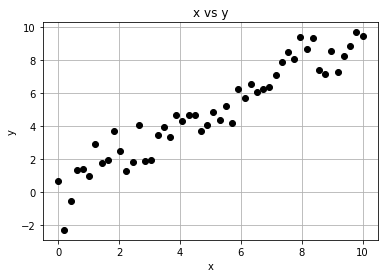

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sim_data['x'], sim_data['y'], 'ko') # ko = black points
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

## Building a Model
Now, you are ready to build and evaluate the model using Python. Python has libraries that contain linear modeling capabilities.

The first python library that is popular for linear regression is `Scikit-learn`.  Scikit-learn is a library that has many different types of machine learning algorithms, but here we concern ourselves with the linear regression capabilities.

The second library is called `Stats-models`.  For those that have experience with the programming language, R, this library is the most similar because it provides easy statistical analysis of linear models that are fitted to the data.

To start, we will show how to use the library `Scikit-learn` for linear regression. Model creation in Scikit-learn generally has two steps, declaring the model formulation and then fitting the model.

In our case we only have one independent variable and one dependent variable. The code in the cell below does the following:  

- Compute the Python model object, `linear_model`, using the simple linear regression.
- Use the model object to compute scores (predicted values) for the dependent variable `y`. In this case, we just use the data that was originally used to compute the model. In a more general case, you can use other data to make predictions from the model.
- The residuals of the model are computed.

Execute this code and examine the head of the data frame computed.

Slope: [[0.9376838]]
Intercept: [0.18626013]
Root mean squared error:  0.7999411714439316
R2 score:  0.9050638541982607


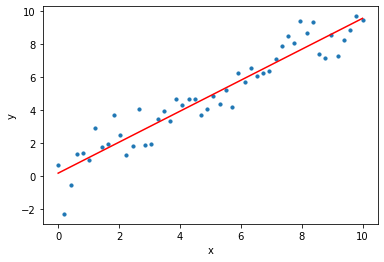

In [4]:
# standard template

# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create numpy arrays for the x (independent) and y (dependent) variables
x = sim_data.x.to_numpy().reshape(-1,1)
y = sim_data.y.to_numpy().reshape(-1,1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

### Plot residuals

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

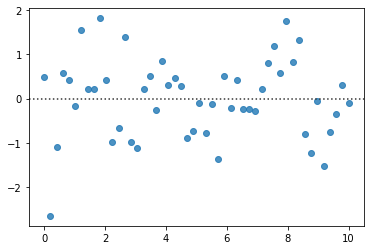

In [5]:
import seaborn as sns
sns.residplot(x, y)

Intercept: 0.18626
Slope : 0.93768


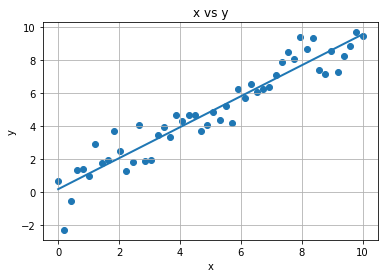

In [6]:
# template on our dataset

from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()

# define x and y
x_input = sim_data['x'].values.reshape(n_points, 1)
y_output = sim_data['y'].values.reshape(n_points, 1)

# fit the model to the existing data with lm.fit(x,y)
linear_model.fit(x_input, y_output)

# Use the fit model to make predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

# Print model parameters by viewing attributes intercept and coef
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

### Stats Model Package
Now we show how to fit a line with Stats Models package. The model declaration and fitting are in a different format as shown below.

In [7]:
import statsmodels.formula.api as sm

# ols = ordinary least squares
ols_model = sm.ols(formula = 'y ~ x', data=sim_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

# fit the model
results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.x))

Intercept: 0.18626
Slope : 0.93768


In [8]:
results.params

Intercept    0.186260
x            0.937684
dtype: float64

In [9]:
# Add predicted to pandas dataframe
sim_data['predicted'] = y_pred
# Add residuals to pandas dataframe
sim_data['resids'] = y_output - y_pred

# View head of data frame
sim_data.head()

,x,y,predicted,resids
0,0.000000,0.680006,0.186260,0.493746
1,0.204082,-2.282142,0.377624,-2.659766
2,0.408163,-0.522395,0.568988,-1.091383
3,0.612245,1.340155,0.760352,0.579802
4,0.816327,1.379675,0.951716,0.427958


In [10]:
# What are the coefficients?  (m = slope, and b = y-intercept)
m = linear_model.coef_[0]
b = linear_model.intercept_
print('m = {}'.format(m[0]))
print('b = {}'.format(b[0]))

m = 0.9376837979830364
b = 0.18626012709053796


### Interpreting the Parameters!

It is very important to know how to interpret the parameters.  Here is an example for the above parameters. (Your results will be different because of the random seed in creating the data.)

**Y Intercept**:  When x is zero, y is -0.53...
    
**Slope**:  When we increase x by 1 then we expect that y will go up by 1.07....

### Model Summary Statistics
The code in the cell below is fairly volumonous, but straight forward. In summary, the code computes summary statistics and makes diagnostic plots for ordinary linear models.

The Scikit-learn library is primarily made for fitting models and getting predictions. For linear regression, we are also interested in many diagnostic plots.  To get these plots easily, we can use a different library called `statsmodels`.

In [11]:
import statsmodels.formula.api as sm
import seaborn as sns

ols_model = sm.ols(formula = 'y ~ x', data=sim_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

Intercept, Slope : Intercept    0.186260
x            0.937684
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 381.3077904336268
SST: 421.30484900582337
SSR: 39.99705857219658
RMSE: 19.527103995053306
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     457.6
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           3.45e-26
Time:                        07:39:17   Log-Likelihood:                -65.366
No. Observations:                  50   AIC:                             134.7
Df Residuals:                      48   BIC:                             138.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
           

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Histogram')

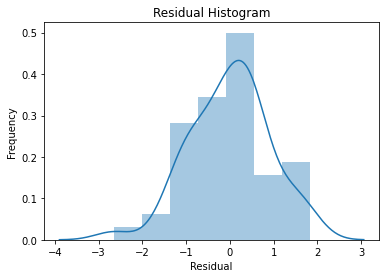

In [12]:
# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

### Your Turn 1
Create a regression model from synthetic data with intercept of 0 and maximum value at ${x = 10, y = 10}$, and with a the error having a standard deviation of 5. Plot the result of your model. How does this slope and intercept of this model compare to the model from the data with a standard deviation of 1? 

**Hint:** You need need to add columns named `score` and `resids` to the data frame before you create the plots. 

In [ ]:
# New Regression Model sd=5

# Replace the ??? with the correct parameters
# Paramters of generated data
n_points = 50
x_start, x_end = 0, ??
y_start, y_end = 0, ??
y_sd = ??

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
reg_data_5 = pd.DataFrame({'x':x_data, 'y':y_data})

reg_data_5.head()

In [ ]:
# replace the ??? with the correct parameters
# Fit the model and get the linear model summaries/plots.
x5_input = reg_data_5['x']
y5_output = reg_data_5['y']
ols5_model = sm.ols(formula='y ~ x', data = reg_data_5)

results5 = ols5_model.fit()

# Get slope (m) and y-intercept (b)
results5.params

In [ ]:
# replace the ??? with the correct parameters
# Additional Statistics
print('\nSSE, SST, SSR, and RMSE:')
mean5_y = np.mean(y5_output)
sst5 = np.sum((y5_output - mean5_y)**2)
sse5 = sst5 - results5.ssr
print('SSE: {}'.format(sse5))
print('SST: {}'.format(sst5))
print('SSR: {}'.format(results5.ssr))
print('RMSE: {}'.format(np.sqrt(results5.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results5.summary())

# Plot a histogram of the residuals, using x to predict y
y5_pred = ols5_model.fit().predict(x5_input)

plt.subplot(1, 2, 1)
sns.distplot(results5.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

plt.subplot(1, 2, 2)
plt.scatter(x5_input, y5_output)
plt.plot(x5_input, y5_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

In [ ]:
# replace the ??? with the correct parameters

# Compare slope and intercept
print('sd=1 Intercept, Slope : \n{}'.format(results.params))
print('\nsd=5 Intercept, Slope : \n{}'.format(results5.params))


# Evaluation of regression models

Now that you have built a regression model, let's look at how you can quantitatively evaluate the performance of a regression model. The evaluation of regression models is based on measurements of the errors.

If we want to know how well we did, we must consider what a good benchmark would be.  A common easy benchmark is to see if we can predict better than just the mean of the target variable.

If we define the following terms:

$\bar{Y}$ - The mean of the target values.

$Y_{i}$ - Target value of the i-th point.

$\hat{Y_{i}}$ - Predicted value of the i-th point.

Then we can defind the following error metrics:

**Sum of Squared Residuals (SSR)**: This is the value that the method of least squares was able to minimize to with the best fit line.

SSR = $\sum \left( Y_{i} - \hat{Y_{i}} \right)^{2}$

**Sum of Squared Total (SST)**: This is a measure of how bad a prediction the target-mean would be.

SST = $\sum \left( Y_{i} - \bar{Y} \right)^{2}$

**Sum of Squared Error (SSE)**: This is a sum of a squared pointwise difference of the (SST - SSR).  You can also think of this as a measurement of how much better we are explaining the variation than the mean.

SSE = $\sum \left( \hat{Y_{i}} - \bar{Y} \right)^{2}$

It is the case that **SST = SSR + SSE**.

We also will be calculating something called the **Root-Mean-Squared-Error**, or the **RMSE**.  The reason we do this is because the Sum-squared-error (also known as the mean-squared error) is in units of x-squared.  To get a handle on understanding the error in units of 'x', we take the square root of the mean-squared-error , or the square root of the sum-square-error.  This is the RMSE.

---------------

The errors of a regression model can be visualized as shown in the figure below. 

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Errors.jpg" alt="Regression_Errors" style="width: 450px;"/>

<center>**Measuring errors for a regression model**
$$Where\\
Y = [y_1, y_2, \ldots, y_n]\\
and\\
y_i = ith\ data\ value\\
\bar{Y} = mean(Y)\\
\\\hat{y_i} = regression\ estimate\ of\ y_i\\
SSE = sum\ square\ explained\ = \Sigma_i{(\hat{y_i} - \bar{Y})^2}\\
SSR = sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}\\
SST = sum\ square\ total\ = \Sigma_i(y_i - \bar{Y})^2$$

The goal of regression is to minimize the residual error, $SSR$. Specifically we wish to explain the maximum amount of the variance in the original data as possible with our model. We can quantify this idea with coefficient of determination also known as $R^2$.

$$R^2 = 1 - \frac{SSR}{SST}\\
so\ as\\
SSR \rightarrow 0\\
R^2 \rightarrow 1$$

In words, $R^2$ is the fraction of the variance of the original data explained by the model. A model that perfectly explains the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$.

However, there are two problems with $R^2$. </center>
 - $R^2$ is not bias adjusted for degrees of freedom.
 - More importantly, there is no adjustment for the number of model parameters. As the number of model parameters increases $SSR$ will generally decrease. Without an adjustment you will get a false sense of model performance.
 
To addresses these related issues, we can use adjusted $R^2$.

$$R^2_{adj} = 1 - \frac{\frac{SSR}{df_{SSR}}}{\frac{SST}{df_{SST}}} = 1 - \frac{var_{residual}}{var_{total}}\\
where\\
df_{SSR} = n - k = SSR\ degrees\ of\ freedom\\
df_{SST} = n - 1 = SST\ degrees\ of\ freedom$$

This gives $R^2_{adj}$ as:

$$R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - k}\\ 
where\\
n = number\ of\ data\ samples\\
k = number\ of\ model\ coefficients$$

Or, we can rewrite $R^2_{adj}$ as:

$$R^2_{adj} =  1.0 - \frac{SSR}{SST}  \frac{n - 1}{n - 1 - k}$$

Another measure of regression performance is root mean square error or $RMSE$:

$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}} = \frac{\sqrt{SSR}}{n}$$

## Your Turn 2

Examine the performance metrics for the previous two regressions with sd=1 and sd=5. 
- How do SSE, SSR, SST, $R^2$, and RMSE compare?

**Hint**: Use `results.rsquared` to find the $R^2$. 

In [ ]:
results.rsquared

In [ ]:
## fill in ?? 
print('      sd1                sd5')
print('SSE: ', sse, sse5)
print('SSR: ', results.ssr, results5.ssr)
print('SST: ', sst, sst5)
print('Rsq: ', results.??,results5.??)
print('RMSE:',np.sqrt(results.mse_model), np.sqrt(results5.mse_model))

## Leverage and Cook's Distance

Up to now, we have only looked at regression models with Normally distributed noise or errors. But, in the real world there are errors and outliers in data. These errors and outliers can have greater or lesser effect, depending on how extreme they are and their placement with respect to the other data. 

You can imagine a regression line as a lever. Outliers that occur near the ends of the lever will have a greater influence all other factors being equal. 

One way to measure influence of a data point is Cook's distance, introduced by Dennis Cook in 1977. The influence for the `ith` data point can be computed as:

$$D_i = \frac{\Sigma_{j=1}^n (\hat{Y_j} - \hat{Y_{j(i)}})^2}{n (p+1)\hat{\sigma^2}} \\
where \\
p = number\ of\ parameters\\
n = number\ of\ data\ points$$

In effect, Cook's distance compares the difference between means with and without a given data point. Computing Cook's distance can be moderately computationally intensive for large data set. Typically, Cook's distance is measured in units of standard deviation.

Let's make these concepts concrete with an example. 

In [ ]:
sim_data.head()

In [ ]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [ ]:
# Create new copy of original linear data
outlier_data = sim_data[['x', 'y']].copy()
# Add an outlier row
outlier = pd.DataFrame([[0.0, 20.0]], columns = ['x', 'y'])
outlier_data.append(outlier, ignore_index=True)

# Scale data
outlier_data['x_scaled'] = scale(outlier_data['x'])

# Fit linear model
outlier_linear = sm.ols(formula = 'y ~ x_scaled', data = outlier_data).fit()

# Get most of the linear regression statistics we are interested in:
print(outlier_linear.summary())

# Plot a histogram of the residuals
y_outlier = outlier_linear.predict(outlier_data['x_scaled'])

plt.subplot(1, 2, 1)
sns.distplot(outlier_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (With 1 Outlier)')

plt.subplot(1, 2, 2)
plt.scatter(outlier_data['x_scaled'], outlier_data['y'])
plt.plot(outlier_data['x_scaled'], y_outlier, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (With 1 Outlier)')

In [ ]:
# Get Linear Regression Summary Plots
# Summary graphs:
import scipy.stats as stats
import statsmodels.api as statsmodels
from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = outlier_linear.resid # outlier_linear = name of linear model on our dataset
fitted_vals = outlier_linear.predict(outlier_data['x_scaled']) # making predictions from our fit model
plt.plot(fitted_vals, residuals, 'o') # plotting predictions from fit model vs residuals
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (w/ 1 outlier)')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (outlier_linear.resid - np.min(outlier_linear.resid)) / np.max(outlier_linear.resid)

# Leverage Plot (Cook's Distance)
influence_plot(outlier_linear)  # from statsmodels.graphics.regressionplots import *

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(outlier_linear, "x_scaled", fig=fig)

'''
Plot regression results against one regressor.

This plots four graphs in a 2 by 2 figure: ‘endog versus exog’, ‘residuals versus exog’, ‘fitted versus exog’ and ‘fitted plus residual versus exog’

'''

## Summary
We looked at a lot of Regression concepts in this lesson so far:

- Single regression equation of a line is $y_i = mx_i + b + \epsilon_i $
- Use the Python model object `linear_model.LinearRegression()` to initialize the model
- Use the `fit` method to fit the model to the data
- Use `predict` method to compute scores(predict values) for the dependent value $y$
- Pull the model parameters $m$ (slope) with `coef` and $b$ (y-intercept) with `intercept`
- The residuals are the difference between the y_output and the y_predicted

- Use the `statsmodels` and `seaborn` libraries to get summary statistics and make diagnostic plots.
- `sm.ols(formula = 'y ~ x', data=sim_data)` and `fit()` method to get the results

Evaluate the results from the OLS Regression Results with `summary` method
- SSR the Sum of the Squared Residuals is the difference in error from the regression line (try to minimize)
- SST the Sum of the Squared Total is the difference to the target mean
- SSE the Sum of the Squared Error is the variation of the regression line to the mean
- RMSE Root Mean Squared Error is the square root of the SSE
- $R^2$ is the fraction of the variance of the original data explained by the model, want a number close to 1.

We created a function to scale data reconstructing the mean standardization.

<div id="reminder" style="border-radius: 5px; background-color:#f5f5f5;" >
<h3>Reminder</h3>
<p>Use this notebook to answer the quiz questions related to the <b>Your Turn</b> sections.<p>
</div>